In [1]:
%load_ext autoreload

In [4]:
cd ..

/home/mars/src_aiai


In [3]:
%autoreload 2
%aimport src.visualisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from src.data import load_M51
from src.sampling.uv_sampling import spider_sampling, random_sampling
from src.operators.NUFFT2D import NUFFT2D
from src.solvers import PrimalDual_l1_constrained
from src.visualisation import compare
from src.operators.dictionary import wavelet_basis

Failed to import NUDFT_cupy (experimental). Use NUDFT() instead. 


In [5]:
%%time
x = np.load('./data/intermediate/COCO/NUFFT_Random/x_true_test_30dB_000.npy')


CPU times: user 0 ns, sys: 378 ms, total: 378 ms
Wall time: 2.34 s


In [6]:
# data + operator

In [29]:
# uv = random_sampling( 4440)

In [52]:
# uv = random_sampling( 4440) #int(256**2/2)) 
uv = spider_sampling(n_wavelengths=18)

# uv /= uv.max()*np.pi

m_op = NUFFT2D()
m_op.plan(uv, (256,256), (512,512), (6,6))

100%|██████████| 7992/7992 [00:01<00:00, 4816.70it/s]


In [8]:
x = np.load('./data/intermediate/COCO/NUFFT_Random/x_true_test_30dB_000.npy')
y = np.load('./data/intermediate/COCO/NUFFT_Random/y_dirty_test_30dB_000.npy')
x_hl = np.load("./data/intermediate/COCO/NNFFT_Random/x_true_test_30dB_000.npy")
y_hl = np.load("./data/processed/COCO/NNFFT_Random/test_predict_highlow_30dB_residual.npy")

In [58]:
x = np.load('./data/intermediate/COCO/NUFFT_SPIDER/x_true_test_30dB_000.npy')
y = np.load('./data/intermediate/COCO/NUFFT_SPIDER/y_dirty_test_30dB_000.npy')
# x_hl = np.load("./data/intermediate/COCO/NNFFT_Random/x_true_test_30dB_000.npy")
x_unet = np.load("./data/processed/COCO/NUFFT_SPIDER/test_predict_UNet_30dB_ramp.npy")

In [76]:
i = 1

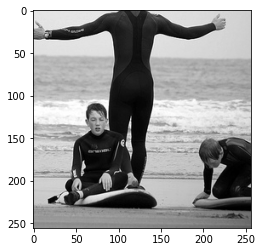

In [77]:
plt.imshow(x[i], cmap='gray')

In [78]:
x_true = x[0, :, :, 0]

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [94]:
%%time


CPU times: user 1min 6s, sys: 1min, total: 2min 6s
Wall time: 2min 7s


In [96]:
s = np.sqrt(np.mean(np.abs(y0)**2, axis=1)) * 10**(-ISNR/20)

In [102]:
np.mean(s)

0.0502971768149195

In [ ]:
x = np.load('./data/intermediate/COCO/NUFFT_SPIDER/x_true_test_30dB_000.npy')
y0 = m_op.dir_op(x)
n = np.random.normal(0, np.mean(s), (10, y0.shape[1])) + 1j * np.random.normal(0, np.mean(s), (10, y0.shape[1]))
nv = np.std((m_op.adj_op(n)))
nv 

In [124]:
nv = np.std((m_op.adj_op(n)))


In [10]:
x.shape
i=5

In [53]:
# # x_true = load_M51()
# x_true /= x_true.max()
ISNR=30

y0 = m_op.dir_op(x[i])
# ISNR = 50 #dB
sigma = np.sqrt(np.mean(np.abs(y0)**2)) * 10**(-ISNR/20)
noise = np.random.normal(0, sigma, y0.shape) + 1j * np.random.normal(0, sigma, y0.shape)
y = y0 + noise

x_dirty = m_op.adj_op(y)
noise_val = np.std((m_op.adj_op(noise)))

w = np.linalg.norm(uv, axis=1)
w = w/w.max()
x_f = m_op.adj_op(y*w)

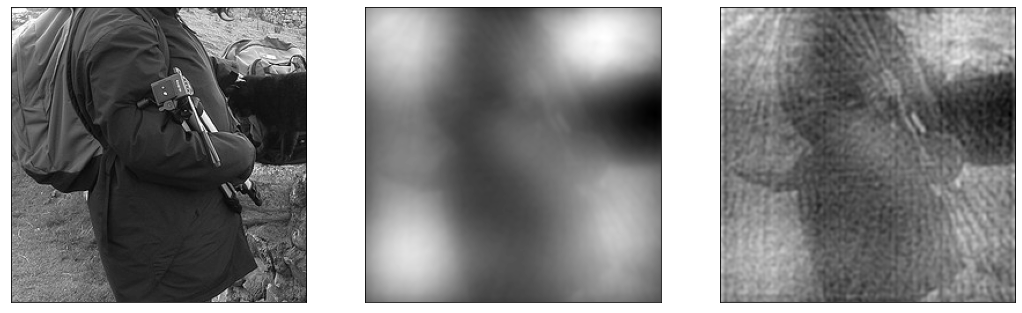

In [54]:
compare([x.real[i], x_dirty.real, x_f.real], cmap='gray')

In [48]:
psi = wavelet_basis(x_dirty.shape)
solver = PrimalDual_l1_constrained(m_op=m_op, psi=psi, beta=1e-2,
    options={
        'tol': 1e-4, 'iter': 300, 'update_iter': 50, 
        'record_iters': False, 'positivity': True, 'real': True})

{'tol': 0.0001, 'iter': 300, 'update_iter': 50, 'record_iters': False, 'positivity': True, 'real': True}


In [26]:
nv = 0.008

In [ ]:
2000/60

In [49]:
noise_val

0.0060449025425034185

In [55]:
%%time
z, diag = solver.solve(y, m_op, noise_val)

2022-02-23 12:50:40,211 - Optimus Primal - INFO - Starting Power method
2022-02-23 12:50:40,568 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2022-02-23 12:50:42,085 - Optimus Primal - INFO - [Power Method] iter = 11, tol = 0.0
2022-02-23 12:50:43,532 - Optimus Primal - INFO - [Power Method] iter = 21, tol = 0.0
2022-02-23 12:50:43,697 - Optimus Primal - INFO - [Power Method] Converged with norm= 10.460073466607057, iter = 22, tol = 0.0009839509262989858
2022-02-23 12:50:43,816 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2022-02-23 12:50:44,005 - Optimus Primal - INFO - [Primal Dual] 0 out of 300 iterations, tol = 0.433596
2022-02-23 12:50:55,053 - Optimus Primal - INFO - [Primal Dual] 50 out of 300 iterations, tol = 0.016459
2022-02-23 12:51:05,826 - Optimus Primal - INFO - [Primal Dual] 100 out of 300 iterations, tol = 0.005657
2022-02-23 12:51:16,744 - Optimus Primal - INFO - [Primal Dual] 150 out of 300 iterations, tol = 0.003488
2022-02-23 12:51:2

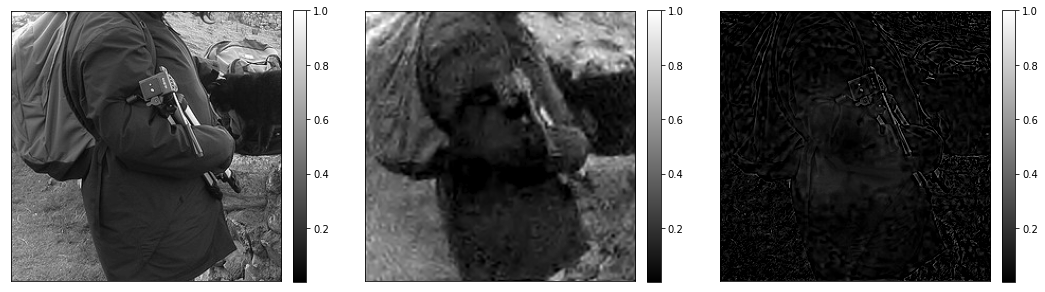

In [56]:
compare([x[i], z.real, x[i]-z.real], same_scale=True, colorbar=True, cmap='gray')

In [122]:
peak_signal_noise_ratio(x[i], z.real), structural_similarity(x[i], z.real)

/tmp/ipykernel_151791/2360541762.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  peak_signal_noise_ratio(x[i], z.real), structural_similarity(x[i], z.real)
/tmp/ipykernel_151791/2360541762.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  peak_signal_noise_ratio(x[i], z.real), structural_similarity(x[i], z.real)


(19.92780523447607, 0.5507936530530847)

In [115]:
peak_signal_noise_ratio(x[i], x_unet[i]), structural_similarity(x[i], x_unet[i])
# peak_signal_noise_ratio(x_hl[i],  y_hl[i]), structural_similarity(x_hl[i], y_hl[i])

(16.0573857781156, 0.626168294864948)

In [93]:
35/0.12-

291.6666666666667

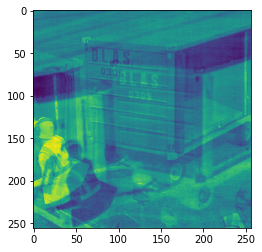

In [55]:
plt.imshow(x_hl[i]- y_hl[i])

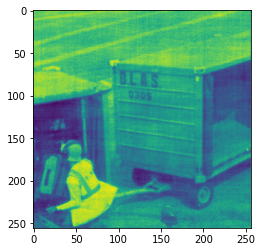

In [53]:
plt.imshow(y_hl[i])

In [47]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [154]:
res = np.load('./data/processed/COCO/NUFFT_SPIDER/PD_train_predict_30dB.npy')


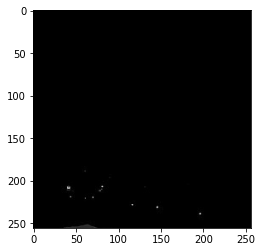

In [155]:
plt.imshow(x[5], cmap='gray')

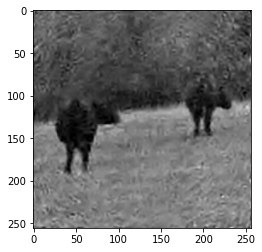

In [163]:
plt.imshow(res[3], cmap='gray')

In [51]:
peak_signal_noise_ratio(x_true, z.real), structural_similarity(x_true, z.real)

(19.058383906247492, 0.5604502601378192)

In [126]:
%%time
x = np.load('./data/intermediate/COCO/NUFFT_SPIDER/x_true_train_30dB_000.npy')
y0 = m_op.dir_op(x)
n = np.random.normal(0, np.mean(s), (10, y0.shape[1])) + 1j * np.random.normal(0, np.mean(s), (10, y0.shape[1]))
nv = np.std((m_op.adj_op(n)))
nv 

CPU times: user 1min 55s, sys: 1min 33s, total: 3min 28s
Wall time: 3min 29s


0.00928955623423615

In [127]:
%%time
x = np.load('./data/intermediate/COCO/NUFFT_Random/x_true_train_30dB_000.npy')
y0 = m_op.dir_op(x)
n = np.random.normal(0, np.mean(s), (10, y0.shape[1])) + 1j * np.random.normal(0, np.mean(s), (10, y0.shape[1]))
nv = np.std((m_op.adj_op(n)))
nv 

CPU times: user 2min 8s, sys: 1min 42s, total: 3min 51s
Wall time: 3min 51s


0.009315019856214805

In [128]:
%%time
x = np.load('./data/intermediate/COCO/NNFFT_Random/x_true_train_30dB_000.npy')
y0 = m_op.dir_op(x)
n = np.random.normal(0, np.mean(s), (10, y0.shape[1])) + 1j * np.random.normal(0, np.mean(s), (10, y0.shape[1]))
nv = np.std((m_op.adj_op(n)))
nv 

CPU times: user 2min 7s, sys: 1min 42s, total: 3min 49s
Wall time: 3min 50s


0.009246387627071693